In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.



/home/anjali/Anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/anjali/Anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
#Read the training & test data
liver_df = pd.read_csv('/home/anjali/Desktop/liver/indian_liver_patient.csv')


#Pandas: whats the data row count?
print(liver_df.shape)
    
#Pandas: What types of data do i have?
print(liver_df.info())

(583, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [4]:
#pandas:whats is the distribution of the data?
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


The following are the observations :

1)In the column of Albumin_and_Globulin_Ratio there are four missing datas.

2)There are 10 features and the last one is the output -Dataset.

3)In the last column ,datasets,Value 1 indicates that the patient has liver disease and 2 indicates the patient does not have liver disease.

4)All are numerical values except in the gender column.

In [5]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age', 'Alkaline_Phosphotase' , 'Alamine_Aminotransferase' , 'Aspartate_Aminotransferase' , 'Dataset']
stringFeatures = ['Gender']
floatFeatures = ['Total_Bilirubin' , 'Direct_Bilirubin' , 'Total_Protiens' , 'Albumin' , 'Albumin_and_Globulin_Ratio']
for feature in liver_df:
    if feature in intFeatures:
        liver_df[feature] = liver_df[feature].fillna(liver_df[feature].mean())
    elif feature in stringFeatures:
        liver_df[feature] = liver_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        liver_df[feature] = liver_df[feature].fillna(liver_df[feature].mean())
    else:
        print('Error: Feature %s not recognized.' % feature)
liver_df.head(5) 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


A graph representing the correlation between the different features will be helpful in Feature Selection

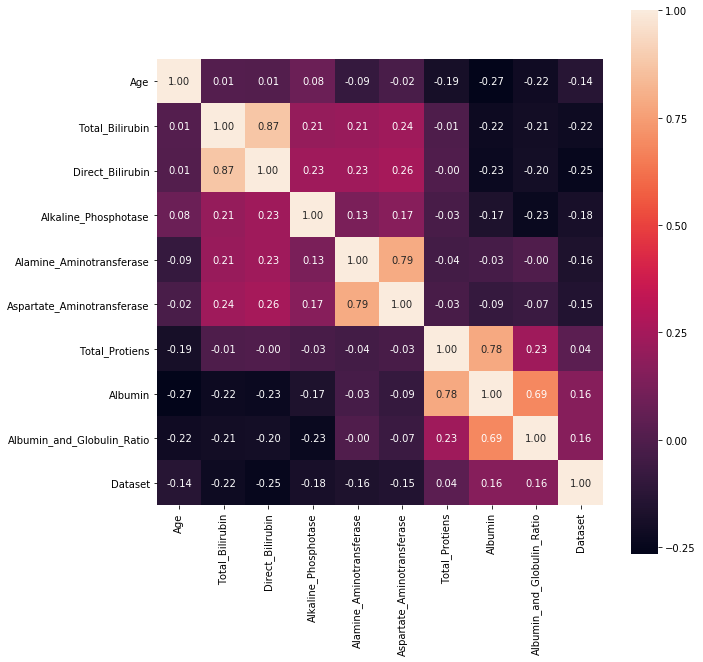

In [7]:
#correlation
correlations = liver_df.corr()

#visualization
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

In the above heatmap, the factor *Gender* has not been considered as it is a **categorical variable** , hence does not fit into the correlation list. We need to check whether *Gender* affects the chances of Liver Diseases.

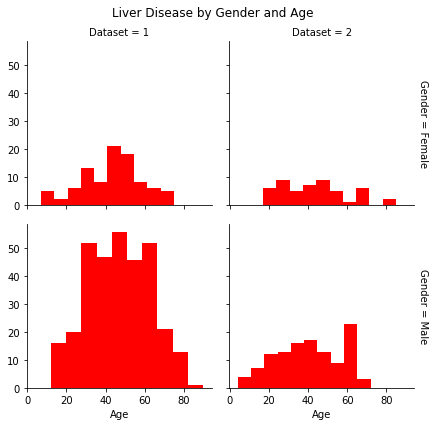

In [8]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Liver Disease by Gender and Age');

 From the Histogram, we may infer that *Gender* affects Liver Disease probability. In order to take into account *Gender* feature for correlation heat map, we need to opt for One-hot-encoding of the *Gender* variable.

In [9]:
#Encoding the Gender variable
encode = preprocessing.LabelEncoder()
encode.fit(liver_df.Gender.unique())
liver_df['Gender_Encoded'] = encode.transform(liver_df.Gender)
liver_df.drop(['Gender'], axis=1, inplace=True)

cols = liver_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
liver_df = liver_df[cols] 

In [10]:
liver_df.head()

,Gender_Encoded,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,1,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Now the *Gender* variable has been encoded into *Gender_Encoded* with 0 for Female and 1 for Male.

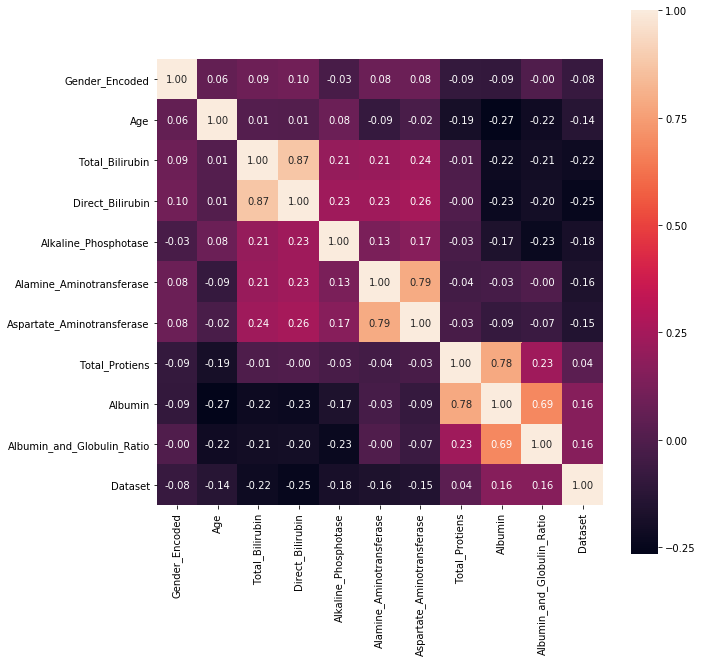

In [11]:
#Correlation among new set of features
correlations = liver_df.corr()

#Visualization of the correlation
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

Feature Selection using ScikitLearn

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

array = liver_df.values
X = array[:,0:10]
y = array[:,10]

reduction_model = ExtraTreesClassifier()
reduction_model.fit(X, y)
arr = reduction_model.feature_importances_
lk = liver_df.columns
data = pd.DataFrame(lk[0:10], index= arr)
data.columns.names= ['Imp']
data

Imp,0
0.026563,Gender_Encoded
0.119588,Age
0.104476,Total_Bilirubin
0.105248,Direct_Bilirubin
0.133034,Alkaline_Phosphotase
0.118119,Alamine_Aminotransferase
0.110920,Aspartate_Aminotransferase
0.092689,Total_Protiens
0.098781,Albumin
0.090582,Albumin_and_Globulin_Ratio


In [13]:
from sklearn.decomposition import NMF
nmf = NMF()
W= nmf.fit_transform(X)

H = nmf.components_

In [14]:
W = pd.DataFrame(W)

H=pd.DataFrame(H)
H

,0,1,2,3,4,5,6,7,8,9
0,0.000040,0.003533,0.000000,0.006540,0.513440,2.751875,6.640902,0.008955,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.018849,36.765563,0.000000,0.000000,0.000047,0.000000,0.000000
2,0.004156,0.008277,0.000602,0.000000,0.018758,10.014112,0.000000,0.009111,0.013858,0.005588
3,0.051115,4.865947,0.037287,0.020932,5.134219,0.000000,0.928033,0.378974,0.159343,0.048877
4,0.023165,0.063462,2.129665,0.857339,8.598303,1.163836,1.784291,0.115228,0.009968,0.000336
5,0.002275,0.100343,0.026208,0.007709,0.121771,0.013987,4.196903,0.007379,0.004684,0.001165
6,0.132181,0.000000,0.000000,0.000000,219.126321,30.000097,3.440806,2.509019,0.806391,0.193407
7,4.011689,591.261095,0.130408,0.000000,730.008787,57.258702,29.536555,0.000000,0.000000,1.376085
8,0.404454,4.447036,0.049052,0.000000,11.236479,5.718175,4.958719,4.945197,2.836632,0.795156
9,0.039353,4.725961,0.079043,0.000000,26.086576,0.561009,1.560582,0.561597,0.251893,0.112149


In [15]:

col_list = ['Age', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase','Total_Protiens', 'Albumin_and_Globulin_Ratio']
liver_df['Dataset'] = liver_df['Dataset'].astype('category')

X = liver_df[col_list]
y = liver_df['Dataset']
#liver_df.info()

In [16]:

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [17]:
def logisticregression():
    
     #Logistic Regression
# Create logistic regression object
    logreg = LogisticRegression()
# Train the model using the training sets and check score
    logreg.fit(X_train, y_train)
#Predict Output
    log_predicted= logreg.predict(X_test)

    logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
    logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
    #print('Logistic Regression Training Score: \n', logreg_score)
    #print('Logistic Regression Test Score: \n', logreg_score_test)
    return logreg_score_test


In [18]:
logisticregression()

70.86

In [19]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    #print('--------- KNeighborsClassifier ----------')
    knn_score = round(knn.score(X_train, y_train) * 100, 2)
    knn_score_test = round(knn.score(X_test, y_test) * 100, 2)
    #print('K Neighbours Classifier Training Score: \n', knn_score)
    #print('K Neighbours Classifier Test Score: \n', knn_score_test)
    return knn_score_test

In [20]:
Knn()

71.43

In [21]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = X.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
   
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    #print('---------- Random Forests -----------')
    forest_score = round(forest.score(X_train, y_train) * 100, 2)
    forest_score_test = round(forest.score(X_test, y_test) * 100, 2)
    #print('Random Forest Classifier Training Score: \n', forest_score)
    #print('Random Forest Classifier Test Score: \n', forest_score_test)
    return forest_score_test

In [22]:
randomForest()

69.71

In [23]:
def SVM():
    types=['rbf' ]
    for i in types:
        model=svm.SVC(kernel=i)
        model.fit(X_train,y_train)
        #print('---------- SVM -----------')
        model_score = round(model.score(X_train, y_train) * 100, 2)
        model_score_test = round(model.score(X_test, y_test) * 100, 2)
        #print('SVM Training Score: \n', model_score)
        #print('SVM Test Score: \n', model_score_test)
        return model_score_test

In [24]:
SVM()

70.29

In [25]:
def NN():
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
    mlp.fit(X_train, y_train)
    #print('---------- Neural Net -----------')
    #mlp.predict(X_test)
    pred_acc_train = round(mlp.score(X_train, y_train)*100, 2)
    pred_acc_test = round(mlp.score(X_test, y_test) * 100, 2)
    #print('NN Training Score: \n', pred_acc_train)
    #print('NN Test Score: \n', pred_acc_test)
    return pred_acc_test

In [26]:
NN()

69.71

In [27]:
Dict = { 'Logistic Regression' : logisticregression(), 'KNN' : Knn(), 'Random Forest' : randomForest(), 'SVM' : SVM(), 'Neural Net' : NN()}

In [28]:
Comp_df = pd.DataFrame(Dict, index= ['0'])

In [29]:
Comp_df.head()

,Logistic Regression,KNN,Random Forest,SVM,Neural Net
0,70.86,71.43,69.71,70.29,69.71


In [30]:
def plotSuccess():
    s = pd.Series(Dict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 80.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

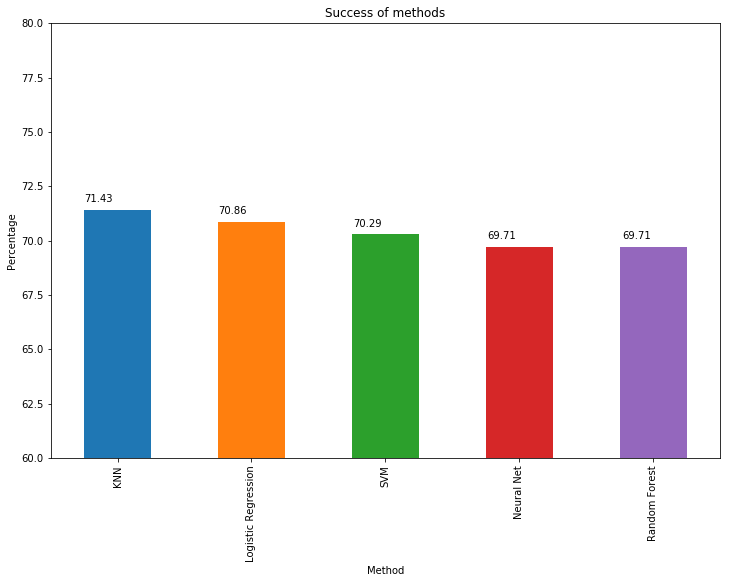

In [31]:
plotSuccess()

Finally the model we selected on the performance based on training sets and test sets.

In [33]:
# fit model
clf = svm.SVC(
    C=1.0,
    probability=True, 
    random_state=1)
clf.fit(X_train, y_train)

print('Training Accuracy: ', clf.score(X_train, y_train))
model_score_test = round(clf.score(X_test, y_test) * 100, 2)
        
print('SVM Test Score: \n', model_score_test)

Training Accuracy:  0.9975490196078431
SVM Test Score: 
 70.29
